In [4]:
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [6]:
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [7]:
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [8]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [9]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

data_API = pd.json_normalize(response.json())

data_API.head()

static_fire_date_utc  static_fire_date_unix    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                      None                    NaN  False     0.0   
2                      None                    NaN  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                      None                    NaN  False     0.0   

                     rocket success  \
0  5e9d0d95eda69955f709d1eb   False   
1  5e9d0d95eda69955f709d1eb   False   
2  5e9d0d95eda69955f709d1eb   False   
3  5e9d0d95eda69955f709d1eb    True   
4  5e9d0d95eda69955f709d1eb    True   

                                                                                                            failures  \
0                                                [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]   
1            [{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]   
2  [{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]   
3                                                                                                                 []   
4                                                                                                                 []   

                                                                                                                                                                                details  \
0                                                                                                                                      Engine failure at 33 seconds and loss of vehicle   
1  Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage   
2                                                                                                                  Residual stage 1 thrust led to collision between stage 1 and stage 2   
3                        Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1   
4                                                                                                                                                                                  None   

  crew ships capsules                                              payloads  \
0   []    []       []                            [5eb0e4b5b6c3bb0006eeb1e1]   
1   []    []       []                            [5eb0e4b6b6c3bb0006eeb1e2]   
2   []    []       []  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   
3   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e5]   
4   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad  flight_number         name  \
0  5e9e4502f5090995de566f86              1    FalconSat   
1  5e9e4502f5090995de566f86              2      DemoSat   
2  5e9e4502f5090995de566f86              3  Trailblazer   
3  5e9e4502f5090995de566f86              4       RatSat   
4  5e9e4502f5090995de566f86              5     RazakSat   

                   date_utc   date_unix                 date_local  \
0  2006-03-24T22:30:00.000Z  1143239400  2006-03-25T10:30:00+12:00   
1  2007-03-21T01:10:00.000Z  1174439400  2007-03-21T13:10:00+12:00   
2  2008-08-03T03:34:00.000Z  1217734440  2008-08-03T15:34:00+12:00   
3  2008-09-28T23:15:00.000Z  1222643700  2008-09-28T11:15:00+12:00   
4  2009-07-13T03:35:00.000Z  1247456100  2009-07-13T15:35:00+12:00   

  date_precision  upcoming  \
0           hour     False   
1           hour     False   
2           hour     False   
3           hour     False   
4           hour     False   

                                                                                 

In [10]:

data_API = data_API[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

data_API = data_API[data_API['cores'].map(len)==1]
data_API = data_API[data_API['payloads'].map(len)==1]

data_API['cores'] = data_API['cores'].map(lambda x : x[0])
data_API['payloads'] = data_API['payloads'].map(lambda x : x[0])

data_API['date'] = pd.to_datetime(data_API['date_utc']).dt.date

data_API = data_API[data_API['date'] <= datetime.date(2020, 11, 13)]

In [11]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [12]:
getBoosterVersion(data_API)
getLaunchSite(data_API)
getPayloadData(data_API)
getCoreData(data_API)

In [13]:
dict_API = {'FlightNumber': list(data_API['flight_number']),
'Date': list(data_API['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

df_API = pd.DataFrame(dict_API)
df_API.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

In [14]:
df = df_API[df_API['BoosterVersion']=='Falcon 9']

df.loc[:,'FlightNumber'] = list(range(1, df.shape[0]+1))
df.reset_index(drop=True)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5            0  B0005  -80.577366  28.561857  
6            0  B0007  -80.577366  28.561857  
7            0  B1003 -120.610829  34.632093  
8            0  B1004  -80.577366  28.561857

In [15]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [16]:
PayloadMass_mean = df['PayloadMass'].mean()

df['PayloadMass'].replace(np.nan, PayloadMass_mean, inplace = True) 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [18]:
landing_outcomes = df['Outcome'].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [19]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])

In [20]:
landing_class = []
for outcome in df['Outcome']:
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [21]:
df['Class']=landing_class
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
4            0  B0003  -80.577366  28.561857      0  
5            0  B0005  -80.577366  28.561857      0  
6            0  B0007  -80.577366  28.561857      0  
7            0  B1003 -120.610829  34.632093      0  
8            0  B1004  -80.577366  28.561857      0

In [22]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [23]:
df['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [24]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [25]:
df["Class"].mean()

0.6666666666666666

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

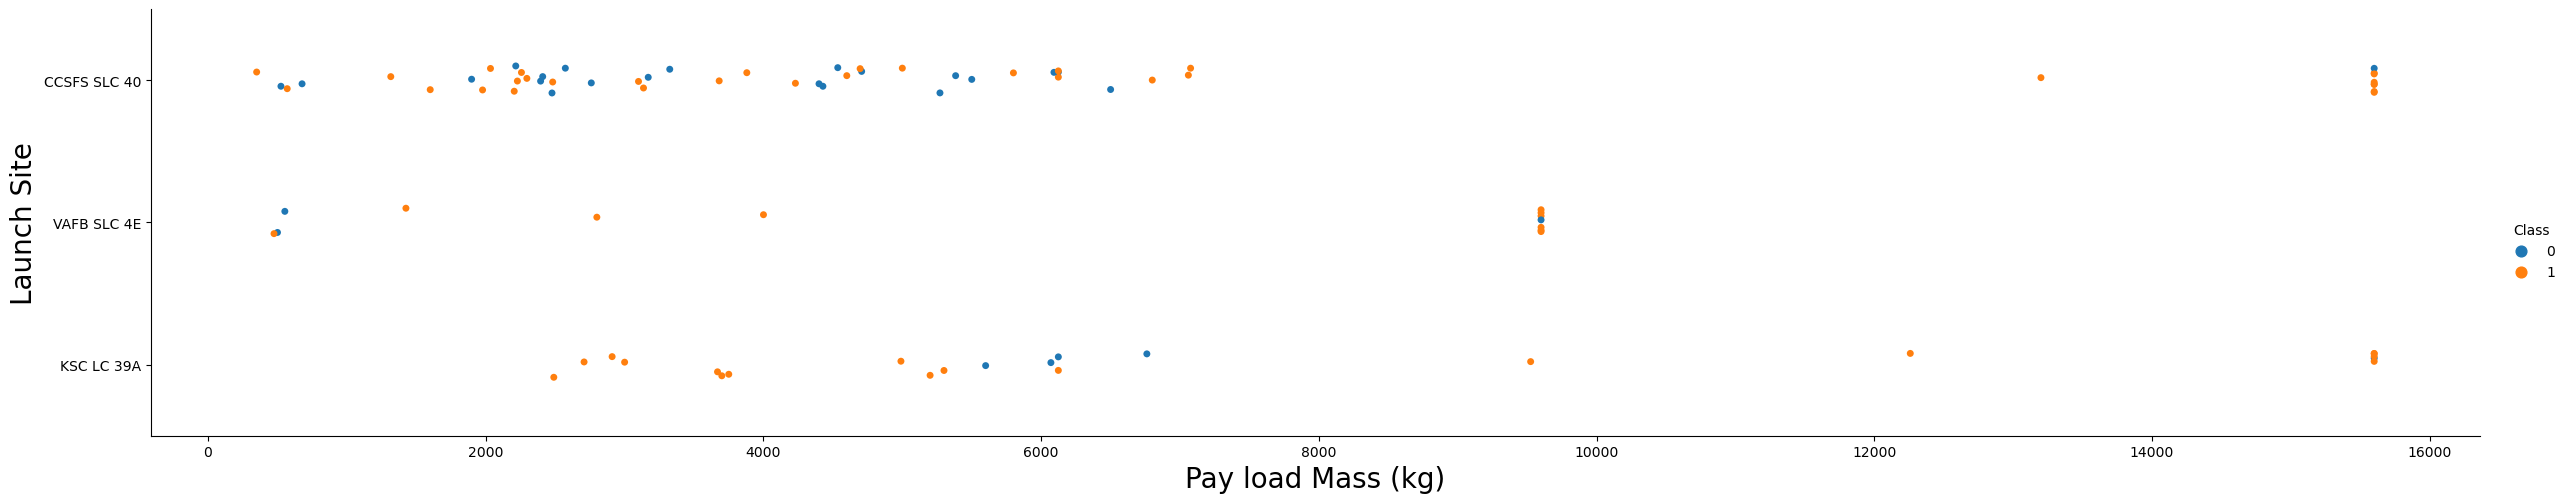

In [27]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

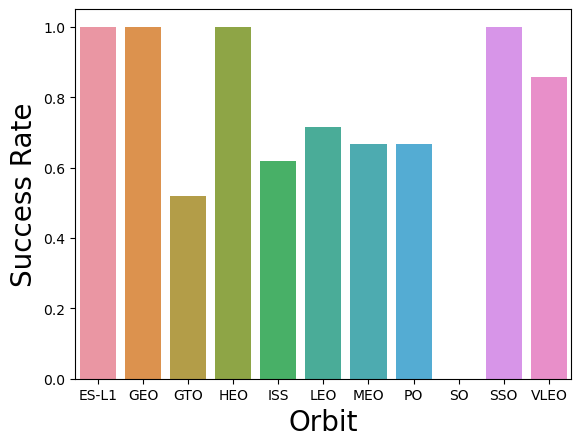

In [28]:
sns.barplot(y="Class", x="Orbit", data=df[['Orbit', 'Class']].groupby(by='Orbit').mean().reset_index())
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

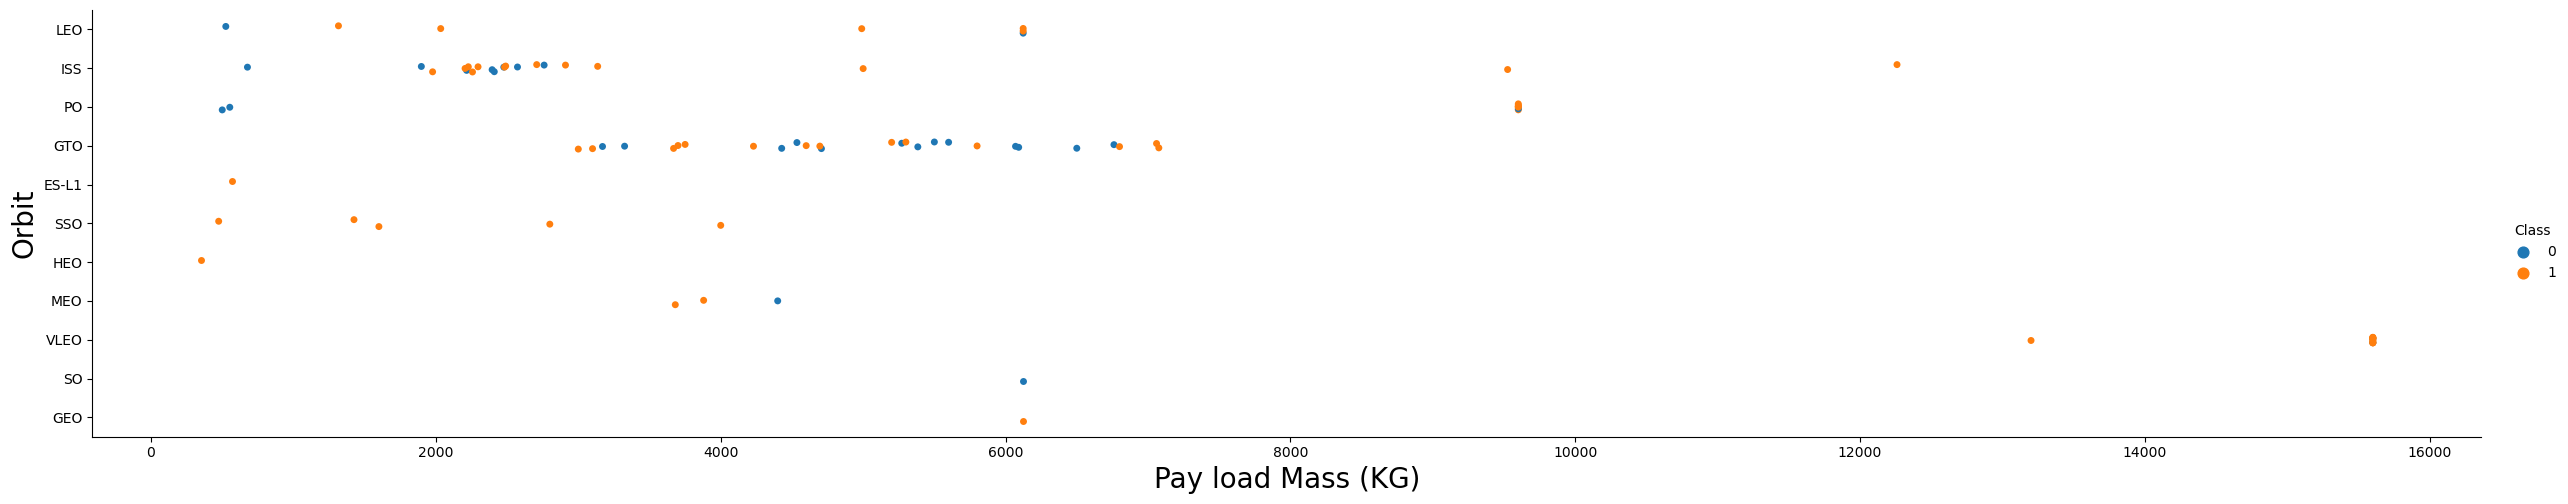

In [29]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (KG)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [30]:
def Extract_year(date):
    for i in df["Date"]:
        year.append(int(i.strftime("%Y")))
    return year

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


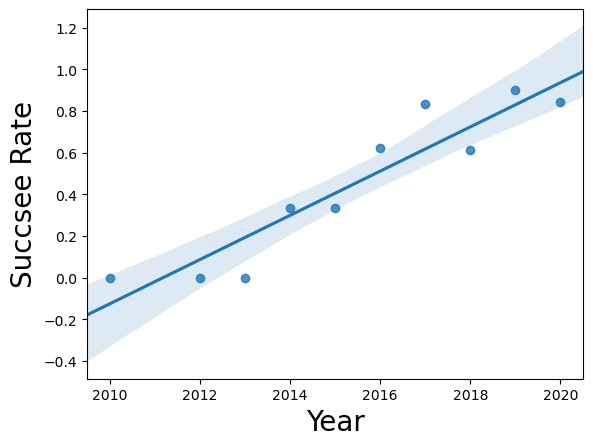

In [31]:
year =[]
df['Year'] = Extract_year(df)
sns.regplot(y="Class", x="Year", data=df[['Year', 'Class']].groupby('Year').mean().reset_index())
plt.xlabel("Year",fontsize=20)
plt.ylabel("Succsee Rate",fontsize=20)
plt.show()

In [32]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium DivIcon plugin
from folium.features import DivIcon

In [33]:
df_folium = df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
df_launch_sites = df_folium.groupby(['LaunchSite'], as_index=False).first()
df_launch_sites = df_launch_sites[['LaunchSite', 'Latitude', 'Longitude']]
df_launch_sites

LaunchSite   Latitude   Longitude
0  CCSFS SLC 40  28.561857  -80.577366
1    KSC LC 39A  28.608058  -80.603956
2   VAFB SLC 4E  34.632093 -120.610829

In [34]:
site_map = folium.Map(location = [29.559684888503615, -95.0830971930759],
                      zoom_start = 4,
                      max_bounds=True)

In [35]:
for i, LaunchSite in enumerate(df_launch_sites['LaunchSite']):
    

    
    circle = folium.Circle(df_launch_sites.loc[i, 'Latitude':'Longitude'].to_list(), radius=100, color='#d35400', fill=True).add_child(folium.Popup(LaunchSite))
    site_map.add_child(circle)

    marker = folium.map.Marker(
        df_launch_sites.loc[i, 'Latitude':'Longitude'].to_list(),

        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % LaunchSite,
            )
        )
    site_map.add_child(marker) 
site_map

In [36]:
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'

# Assign marker color for each row in dataframe
df_folium['marker_color'] = df_folium['Class'].apply(assign_marker_color)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
marker_cluster = MarkerCluster()

# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# create a Marker object with its coordinate 
# and customize the Marker's icon property to indicate if this launch was successed or failed
for index, row in df_folium.iterrows():
    # Create and add a Marker cluster to the site map
    marker = folium.map.Marker([row['Latitude'], row['Longitude']]
        ,
        # Create an icon as a text label
        icon=folium.Icon(color='white', icon_color=row['marker_color'])
                              )
    marker_cluster.add_child(marker)

In [38]:
location_CCSFS_SLC_40 = [28.561857, -80.577366]
bound = [0.001, 0.001]
sw = list(np.subtract(location_CCSFS_SLC_40, bound))
ne = list(np.add(location_CCSFS_SLC_40, bound))
site_map.fit_bounds([sw, ne])
site_map

In [39]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [40]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [41]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
4             1  6123.547647   LEO  CCSFS SLC 40        1     False   False   
5             2   525.000000   LEO  CCSFS SLC 40        1     False   False   
6             3   677.000000   ISS  CCSFS SLC 40        1     False   False   
7             4   500.000000    PO   VAFB SLC 4E        1     False   False   
8             5  3170.000000   GTO  CCSFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
4  False       None    1.0            0  B0003  
5  False       None    1.0            0  B0005  
6  False       None    1.0            0  B0007  
7  False       None    1.0            0  B1003  
8  False       None    1.0            0  B1004

In [42]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
4            0          0          0          0          0          1   
5            0          0          0          0          0          1   
6            0          0          0          0          1          0   
7            0          0          0          0          0          0   
8            0          0          1          0          0          0   

   Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
4          0         0         0          0           0   
5          0         0         0          0           0   
6          0         0         0          0           0   
7          0         1         0          0           0   
8          0         0         0          0           0   

   LaunchSite_CCSFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
4                        1                      0                       0   
5                        1                      0                       0   
6                        1                      0                       0   
7                        0                      0                       1   
8                        1                      0                       0   

   LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
4                                    0                                    0   
5                                    0                                    0   
6                                    0                                    0   
7                                    0                                    0   
8                                    0                                    0   

   LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3032383ecb761634e7cb  \
4                                    0                                    0   
5                                    0                                    0   
6                                    0                                    0   
7                                    0                                    0   
8                                    0                                    0   

   LandingPad_5e9e3033383ecbb9e534e7cc  Serial_B0003  Serial_B0005  \
4                                    0             1             0   
5                                    0             0             1   
6                                    0             0             0   
7                                    0             0             0   
8                                    0             0             0   

   Serial_B0007  Serial_B1003  Serial_B1004  Serial_B1005  Serial_B1006  \
4             0             0             0             0             0   
5             0             0             0             0             0   
6             1             0             0             0             0   
7             0             1             0             0             0   
8             0             0             1             0             0   

   Serial_B1007  Serial_B1008  Serial_B1010  Serial_B1011  Serial_B1012  \
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   

   Serial_B1013  Serial_B1015  Serial_B1016  Serial_B1017  Serial_B1018  \
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   

   Serial_B1019  Seria

In [43]:
X = features.merge(features_one_hot, left_index=True, right_index=True)
X.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
4             1  6123.547647   LEO  CCSFS SLC 40        1     False   False   
5             2   525.000000   LEO  CCSFS SLC 40        1     False   False   
6             3   677.000000   ISS  CCSFS SLC 40        1     False   False   
7             4   500.000000    PO   VAFB SLC 4E        1     False   False   
8             5  3170.000000   GTO  CCSFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  Orbit_ES-L1  Orbit_GEO  \
4  False       None    1.0            0  B0003            0          0   
5  False       None    1.0            0  B0005            0          0   
6  False       None    1.0            0  B0007            0          0   
7  False       None    1.0            0  B1003            0          0   
8  False       None    1.0            0  B1004            0          0   

   Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  \
4          0          0          0          1          0         0         0   
5          0          0          0          1          0         0         0   
6          0          0          1          0          0         0         0   
7          0          0          0          0          0         1         0   
8          1          0          0          0          0         0         0   

   Orbit_SSO  Orbit_VLEO  LaunchSite_CCSFS SLC 40  LaunchSite_KSC LC 39A  \
4          0           0                        1                      0   
5          0           0                        1                      0   
6          0           0                        1                      0   
7          0           0                        0                      0   
8          0           0                        1                      0   

   LaunchSite_VAFB SLC 4E  LandingPad_5e9e3032383ecb267a34e7c7  \
4                       0                                    0   
5                       0                                    0   
6                       0                                    0   
7                       1                                    0   
8                       0                                    0   

   LandingPad_5e9e3032383ecb554034e7c9  LandingPad_5e9e3032383ecb6bb234e7ca  \
4                                    0                                    0   
5                                    0                                    0   
6                                    0                                    0   
7                                    0                                    0   
8                                    0                                    0   

   LandingPad_5e9e3032383ecb761634e7cb  LandingPad_5e9e3033383ecbb9e534e7cc  \
4                                    0                                    0   
5                                    0                                    0   
6                                    0                                    0   
7                                    0                                    0   
8                                    0                                    0   

   Serial_B0003  Serial_B0005  Serial_B0007  Serial_B1003  Serial_B1004  \
4             1             0             0             0             0   
5             0             1             0             0             0   
6             0             0             1             0             0   
7             0             0             0             1             0   
8             0             0             0             0             1   

   Serial_B1005  Serial_B1006  Serial_B1007  Serial_B1008  Serial_B1010  \
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0    

In [44]:
X.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1, inplace=True)

In [45]:
X.astype('float64')

FlightNumber   PayloadMass  Flights  GridFins  Reused  Legs  Block  \
4            1.0   6123.547647      1.0       0.0     0.0   0.0    1.0   
5            2.0    525.000000      1.0       0.0     0.0   0.0    1.0   
6            3.0    677.000000      1.0       0.0     0.0   0.0    1.0   
7            4.0    500.000000      1.0       0.0     0.0   0.0    1.0   
8            5.0   3170.000000      1.0       0.0     0.0   0.0    1.0   
..           ...           ...      ...       ...     ...   ...    ...   
89          86.0  15600.000000      2.0       1.0     1.0   1.0    5.0   
90          87.0  15600.000000      3.0       1.0     1.0   1.0    5.0   
91          88.0  15600.000000      6.0       1.0     1.0   1.0    5.0   
92          89.0  15600.000000      3.0       1.0     1.0   1.0    5.0   
93          90.0   3681.000000      1.0       1.0     0.0   1.0    5.0   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
4           0.0          0.0        0.0        0.0        0.0        0.0   
5           0.0          0.0        0.0        0.0        0.0        0.0   
6           0.0          0.0        0.0        0.0        0.0        1.0   
7           0.0          0.0        0.0        0.0        0.0        0.0   
8           0.0          0.0        0.0        1.0        0.0        0.0   
..          ...          ...        ...        ...        ...        ...   
89         12.0          0.0        0.0        0.0        0.0        0.0   
90         13.0          0.0        0.0        0.0        0.0        0.0   
91         12.0          0.0        0.0        0.0        0.0        0.0   
92         12.0          0.0        0.0        0.0        0.0        0.0   
93          8.0          0.0        0.0        0.0        0.0        0.0   

    Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
4         1.0        0.0       0.0       0.0        0.0         0.0   
5         1.0        0.0       0.0       0.0        0.0         0.0   
6         0.0        0.0       0.0       0.0        0.0         0.0   
7         0.0        0.0       1.0       0.0        0.0         0.0   
8         0.0        0.0       0.0       0.0        0.0         0.0   
..        ...        ...       ...       ...        ...         ...   
89        0.0        0.0       0.0       0.0        0.0         1.0   
90        0.0        0.0       0.0       0.0        0.0         1.0   
91        0.0        0.0       0.0       0.0        0.0         1.0   
92        0.0        0.0       0.0       0.0        0.0         1.0   
93        0.0        1.0       0.0       0.0        0.0         0.0   

    LaunchSite_CCSFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
4                       1.0                    0.0                     0.0   
5                       1.0                    0.0                     0.0   
6                       1.0                    0.0                     0.0   
7                       0.0                    0.0                     1.0   
8                       1.0                    0.0                     0.0   
..                      ...                    ...                     ...   
89                      0.0                    1.0                     0.0   
90                      0.0                    1.0                     0.0   
91                      0.0                    1.0                     0.0   
92                      1.0                    0.0                     0.0   
93                      1.0                    0.0                     0.0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
4                                   0.0                                  0.0   
5                                   0.0                                  0.0   
6                                   0.0                                  0.0   
7                                   0.0                                  0.0   
8           

In [46]:
Y = df['Class'].to_numpy()

In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
Y_test.shape

(18,)

In [50]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# create model and tune hyperparameter
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
logreg_cv_score = logreg_cv.score(X_test, Y_test)
print("Logistic Regression model")
print("tuned hypererparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy (train data):",logreg_cv.best_score_)
print("accuracy (test data):",logreg_cv_score)

Logistic Regression model
tuned hypererparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy (train data): 0.8194444444444444
accuracy (test data): 0.8333333333333334


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


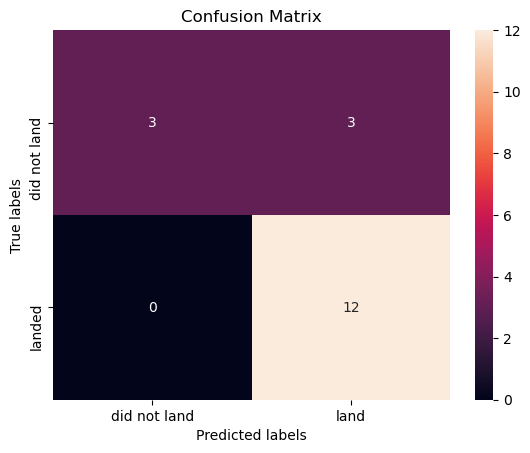

In [51]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [52]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# create model and tune hyperparameter
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
svm_cv_score = svm_cv.score(X_test, Y_test)
print("Support Vector Machine model")
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy (train data):",svm_cv.best_score_)
print("accuracy (test data):",svm_cv_score)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

Support Vector Machine model
tuned hyperparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy (train data): 0.8333333333333334
accuracy (test data): 0.8333333333333334


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


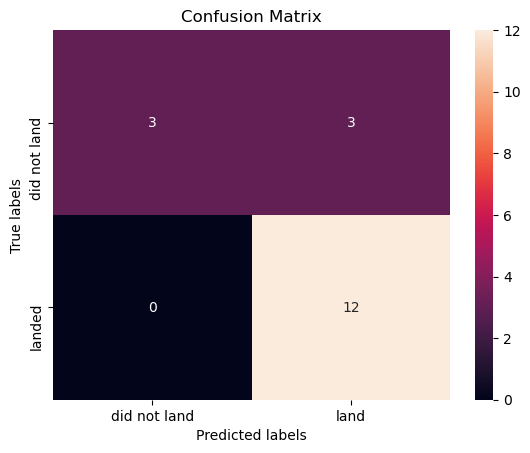

In [53]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [54]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# create model and tune hyperparameter
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
tree_cv_score = tree_cv.score(X_test, Y_test)
print("Decision Tree Classifier model")
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy (train data):",tree_cv.best_score_)
print("accuracy (test data):",tree_cv_score)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

Decision Tree Classifier model
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy (train data): 0.875
accuracy (test data): 0.8333333333333334


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

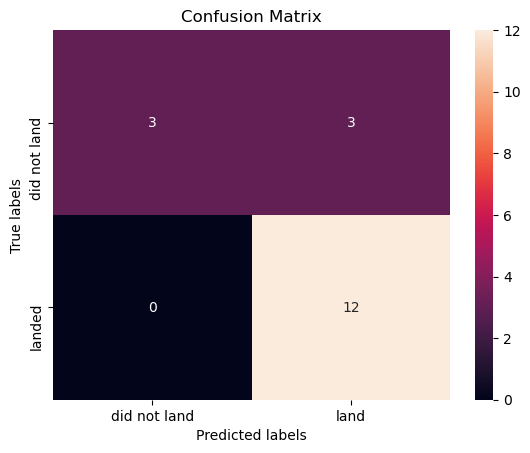

In [55]:
# create confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [56]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# create model and tune hyperparameter
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
knn_cv_score = knn_cv.score(X_test, Y_test)
print("K Nearest Neighbors model")
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy (train data):",knn_cv.best_score_)
print("accuracy (test data):",knn_cv_score)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

K Nearest Neighbors model
tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy (train data): 0.8333333333333334
accuracy (test data): 0.7777777777777778


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.2

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


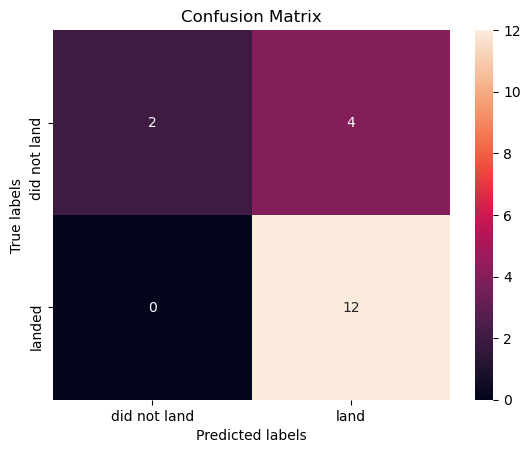

In [57]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [58]:
model_dict = {"Model": ['Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'K Nearest Neighbors'], 
              "Accuracy": [logreg_cv_score, svm_cv_score, tree_cv_score, knn_cv_score]}
model = pd.DataFrame(model_dict)
model

Model  Accuracy
0       Logistic Regression  0.833333
1    Support Vector Machine  0.833333
2  Decision Tree Classifier  0.833333
3       K Nearest Neighbors  0.777778

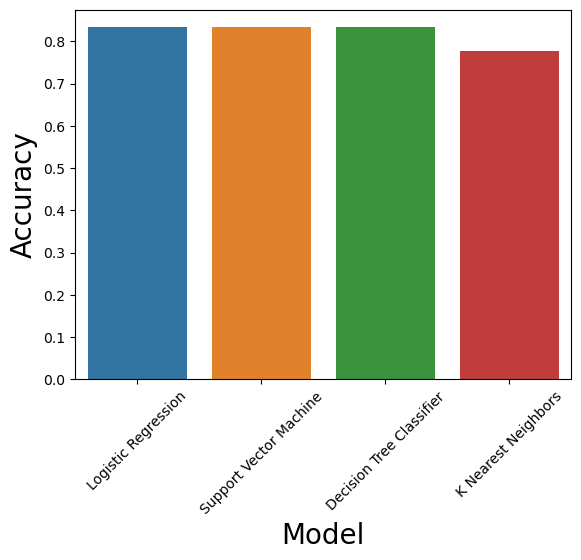

In [59]:
sns.barplot(y="Accuracy", x="Model", data=model)
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.show()